In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
csv_path = '/Users/Andey/Desktop/Fall2020/fairness_research/uci/student/student-mat.csv'
df = pd.read_csv(csv_path ,sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [23]:
all_columns = []
for i in df:
    all_columns.append(i)
features = all_columns[:-3]
all_columns

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

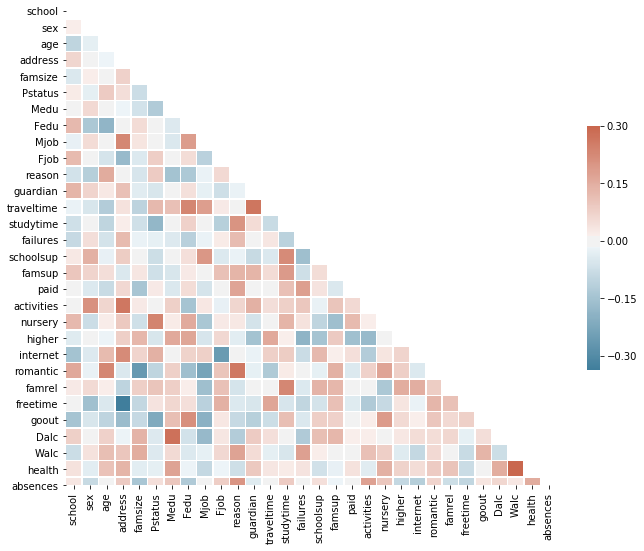

In [19]:
#HEATMAP OF ALL THE FEATURES

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 30)),
                 columns=features)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

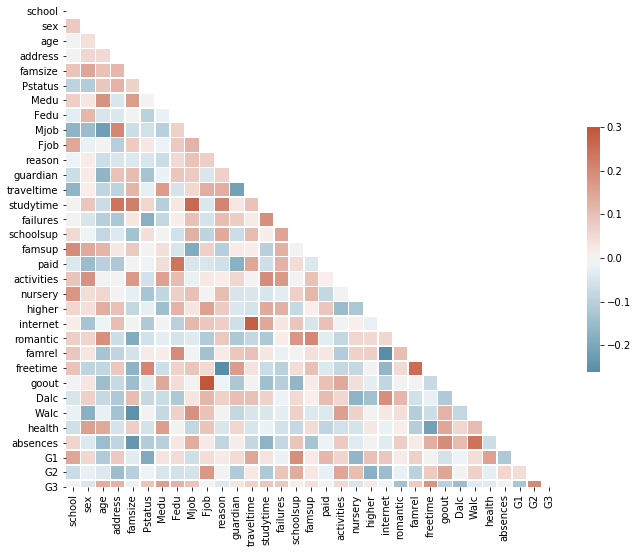

In [25]:
#HEATMAP OF ALL COLUMNS -- INCLUDED SCORE

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 33)),
                 columns=all_columns)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

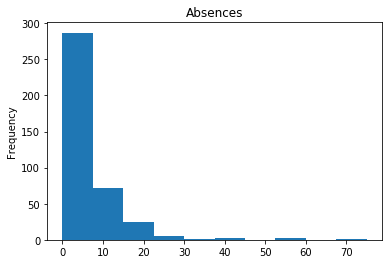

In [3]:
df['absences'].plot.hist(bins = 10, title = 'Absences')

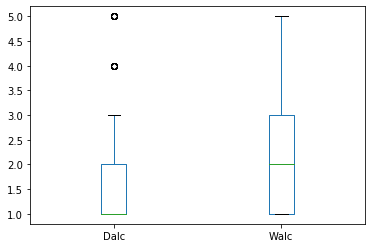

In [4]:
df[['Dalc','Walc']].plot.box()

In [27]:
#correlations between first period grade, second period grade, final grade
corr = df[['G1','G2','G3']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,G1,G2,G3
G1,1,0.85,0.8
G2,0.85,1,0.9
G3,0.8,0.9,1


In [5]:
#correlations for social relationships
corr = df[['famrel','goout','traveltime','failures','G3']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,famrel,goout,traveltime,failures,G3
famrel,1,0.065,-0.017,-0.044,0.051
goout,0.065,1,0.029,0.12,-0.13
traveltime,-0.017,0.029,1,0.092,-0.12
failures,-0.044,0.12,0.092,1,-0.36
G3,0.051,-0.13,-0.12,-0.36,1


In [26]:
#correlations for time spent
corr = df[['traveltime','studytime','failures','G1','G2','G3']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,traveltime,studytime,failures,G1,G2,G3
traveltime,1,-0.1,0.092,-0.093,-0.15,-0.12
studytime,-0.1,1,-0.17,0.16,0.14,0.098
failures,0.092,-0.17,1,-0.35,-0.36,-0.36
G1,-0.093,0.16,-0.35,1,0.85,0.8
G2,-0.15,0.14,-0.36,0.85,1,0.9
G3,-0.12,0.098,-0.36,0.8,0.9,1


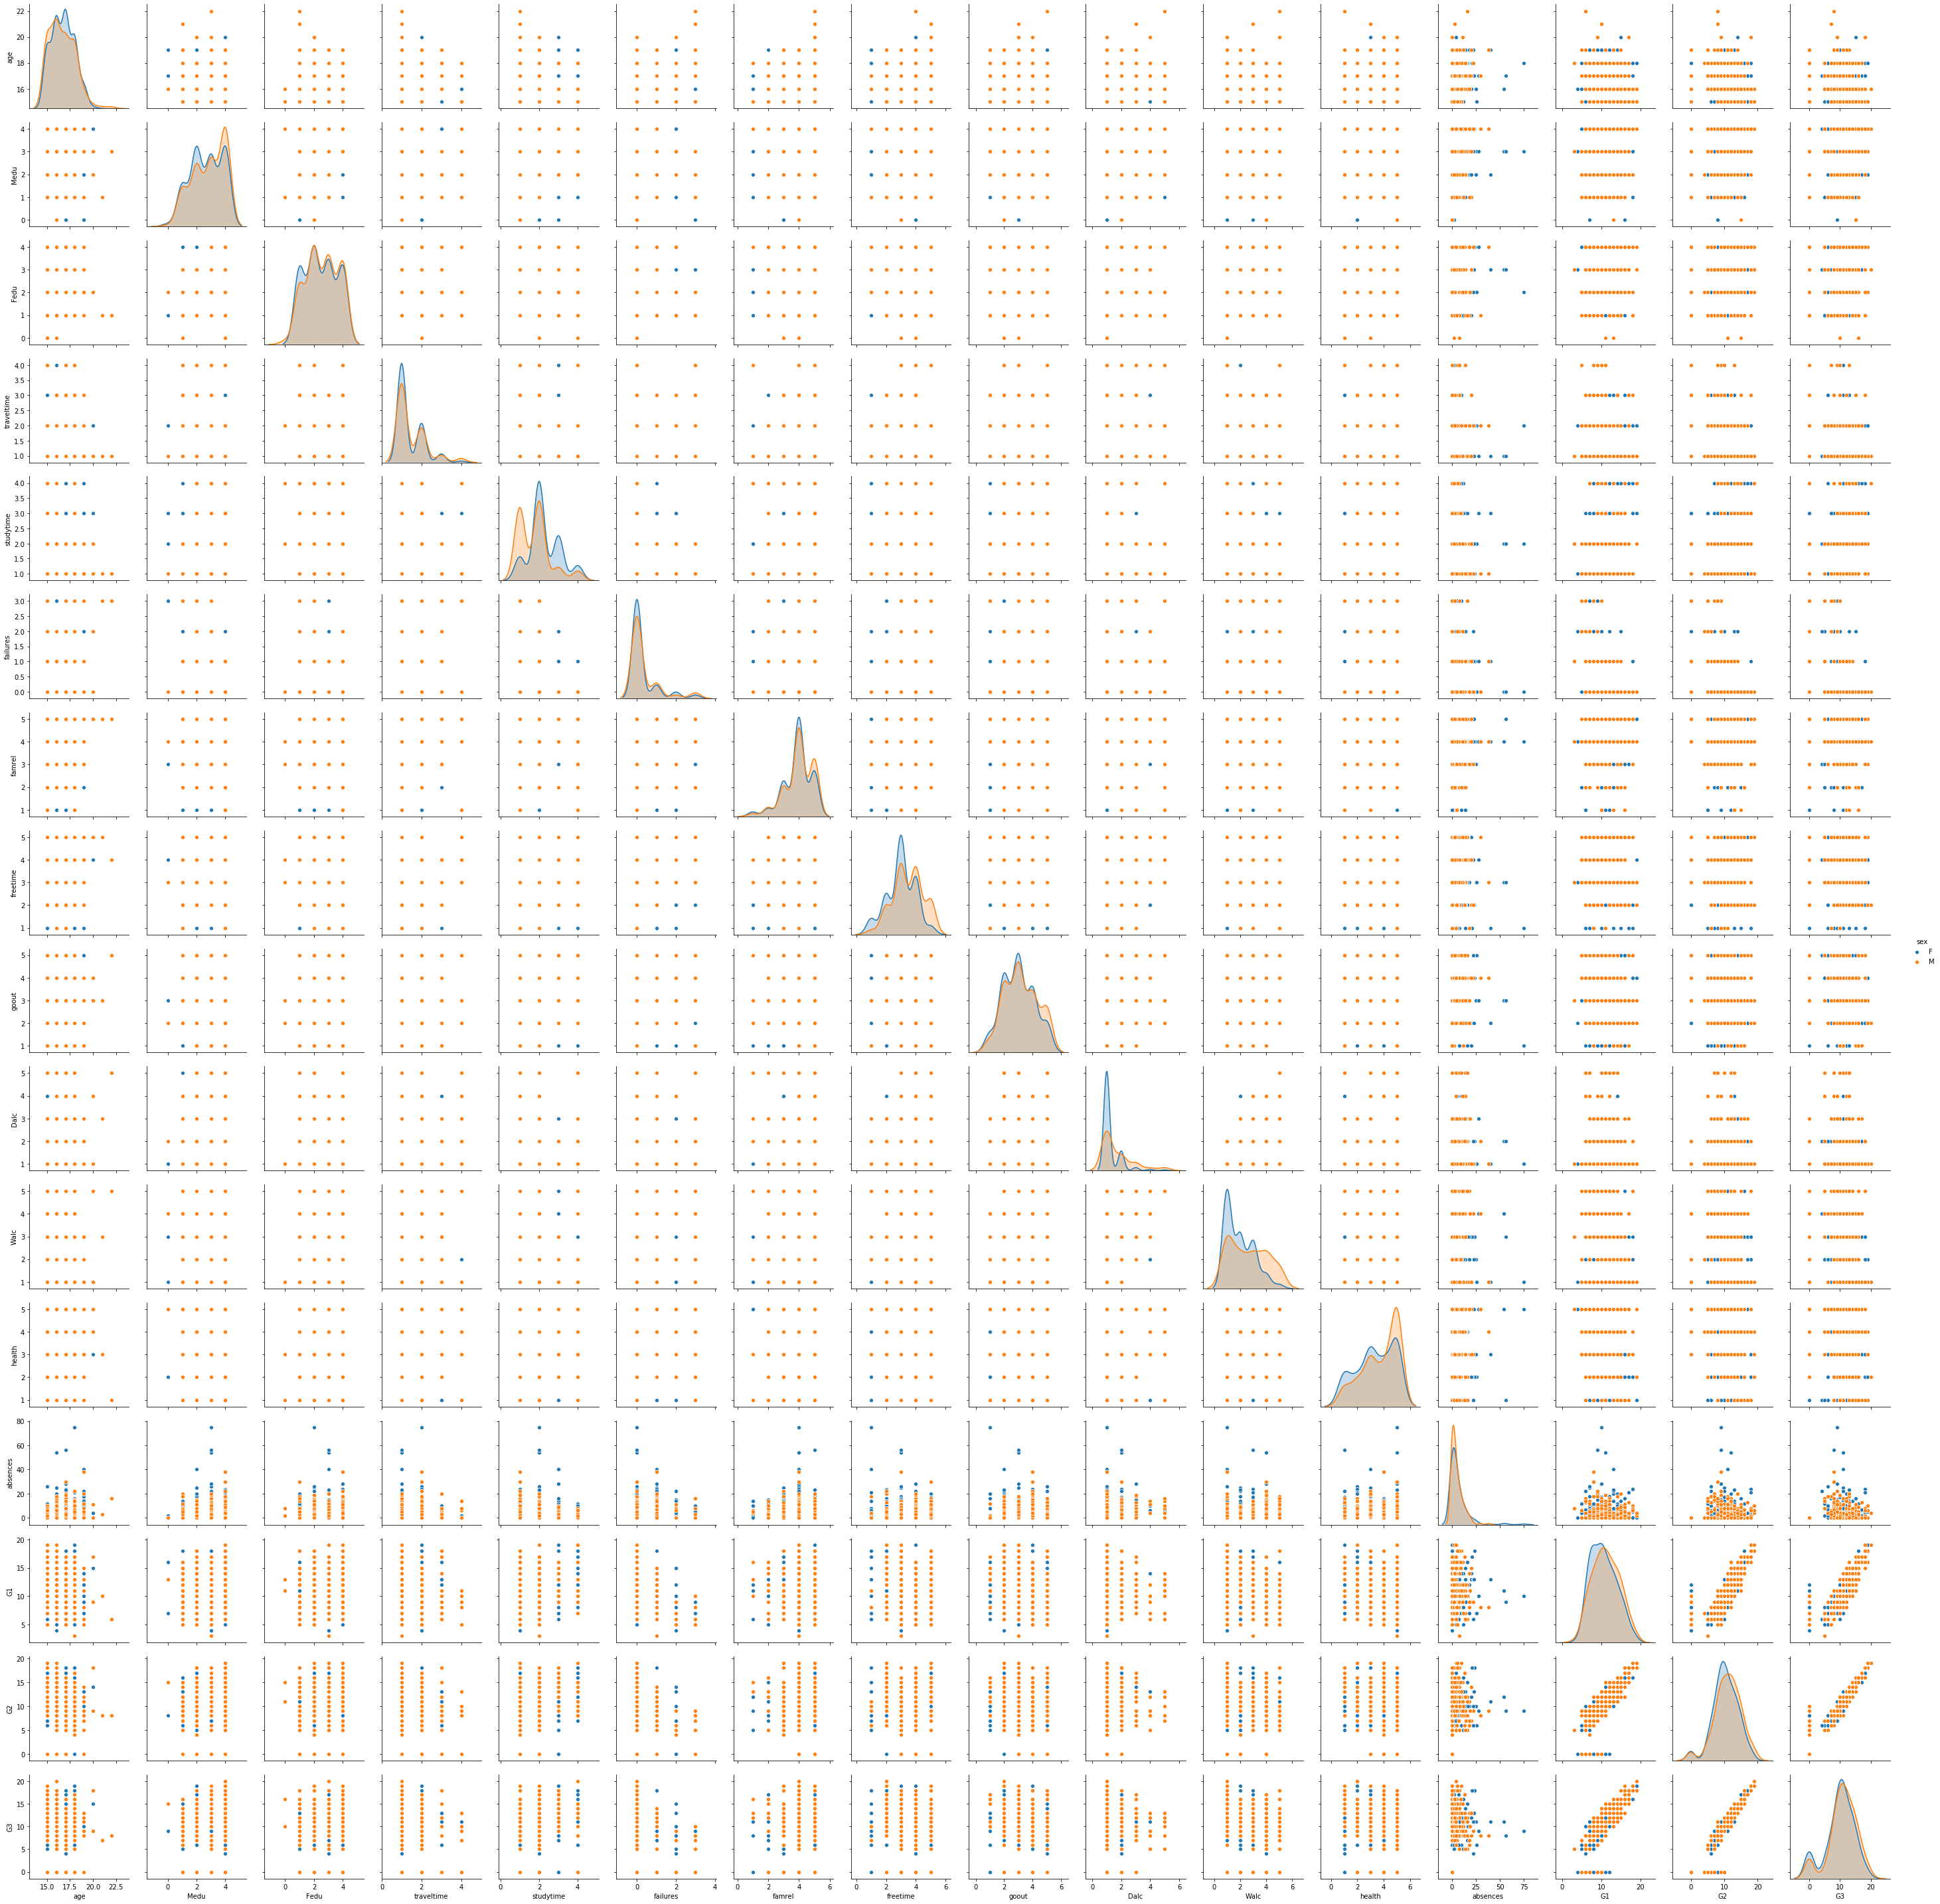

In [21]:
sns.pairplot(df, hue = 'sex')

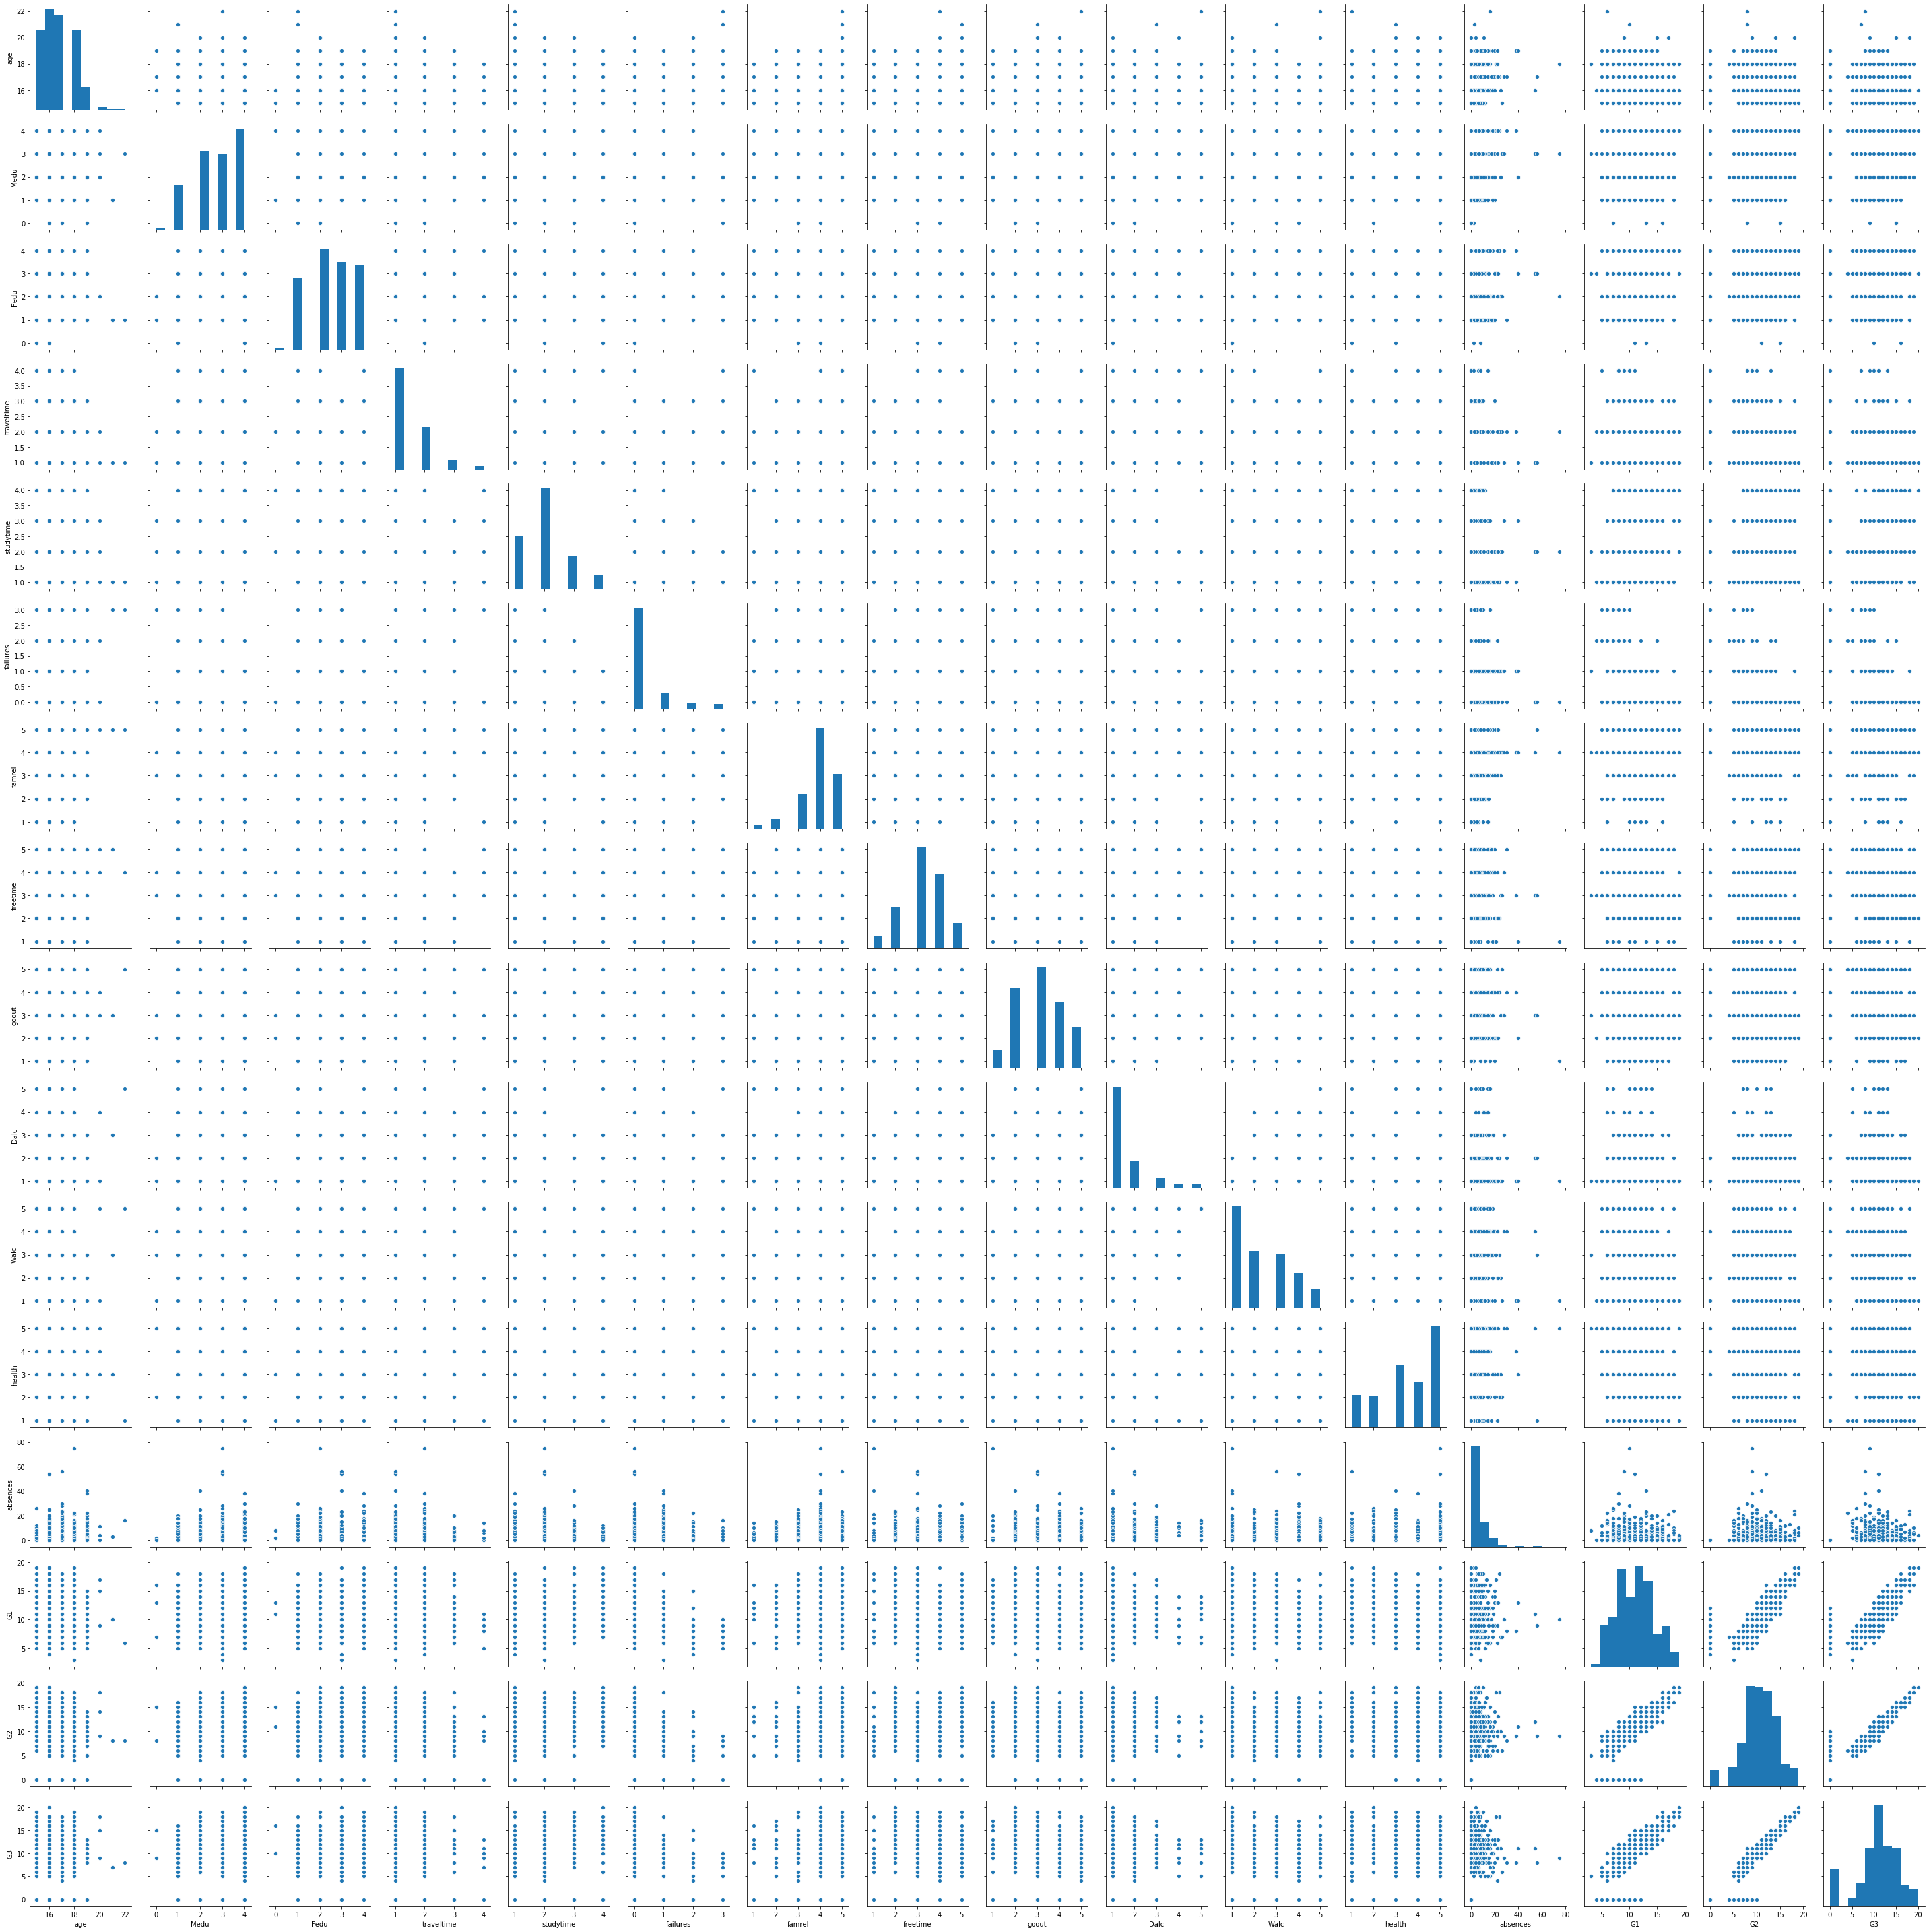

In [20]:
sns.pairplot(df)

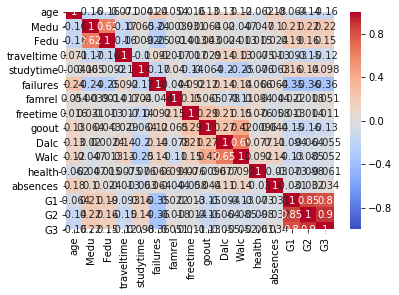

In [36]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')